In [1]:
%config IPCompleter.greedy=True

In [142]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas_datareader as pdr
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score


In [143]:
pwd


'C:\\Users\\rony1\\Documents\\New folder'

In [144]:
cd C:\Users\rony1\Documents\New folder

C:\Users\rony1\Documents\New folder


In [145]:
Apple_df = pd.read_csv('AAPL.csv')
Amazon_df = pd.read_csv('AMZN.csv')
Google_df = pd.read_csv('GOOG.csv')
Microsoft_df = pd.read_csv('MSFT.csv')
Facebook_df = pd.read_csv('FB.csv')

In [126]:
Apple_df = pd.read_csv('AAPL.csv')
Amazon_df = pd.read_csv('AMZN.csv')
Google_df = pd.read_csv('GOOG.csv')
Microsoft_df = pd.read_csv('MSFT.csv')
Facebook_df = pd.read_csv('FB.csv')

In [127]:
style.use('classic')

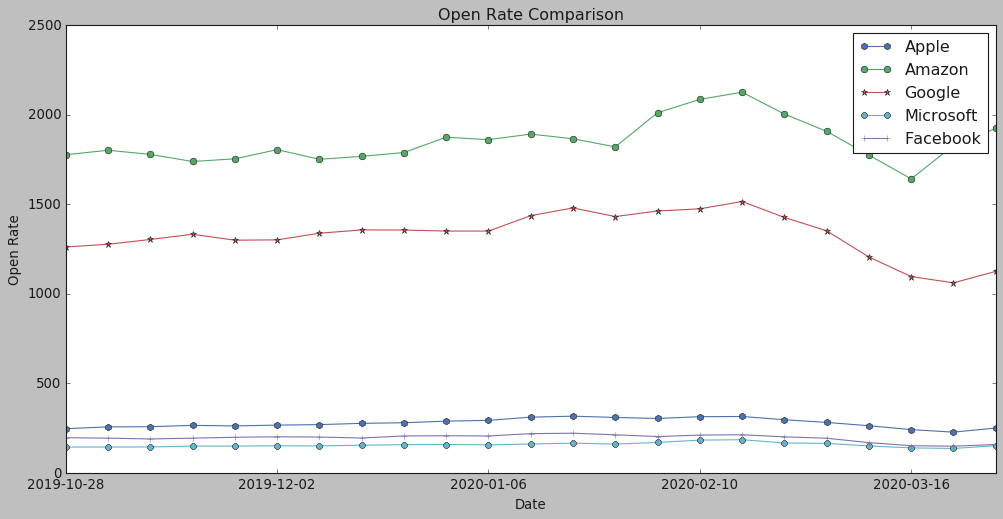

In [128]:
ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

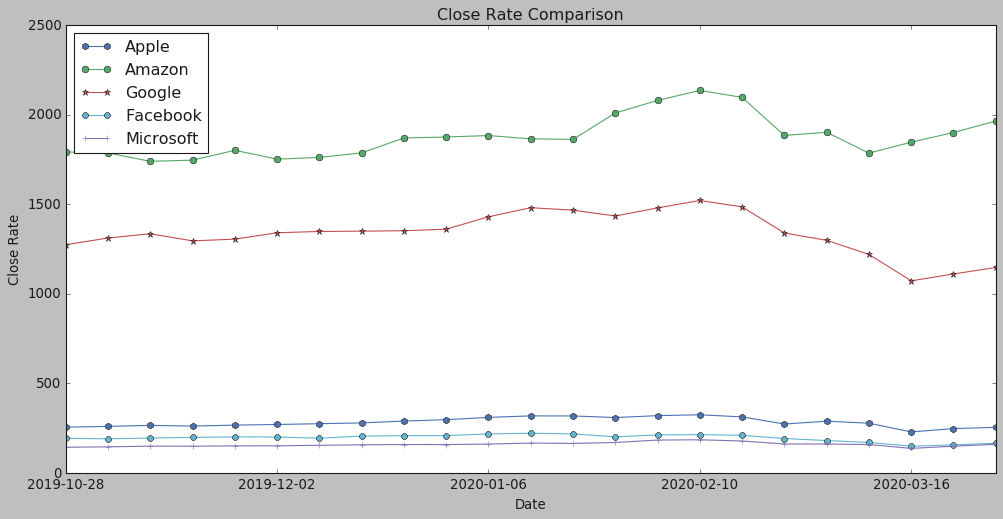

In [129]:
ax = plt.gca()

Apple_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

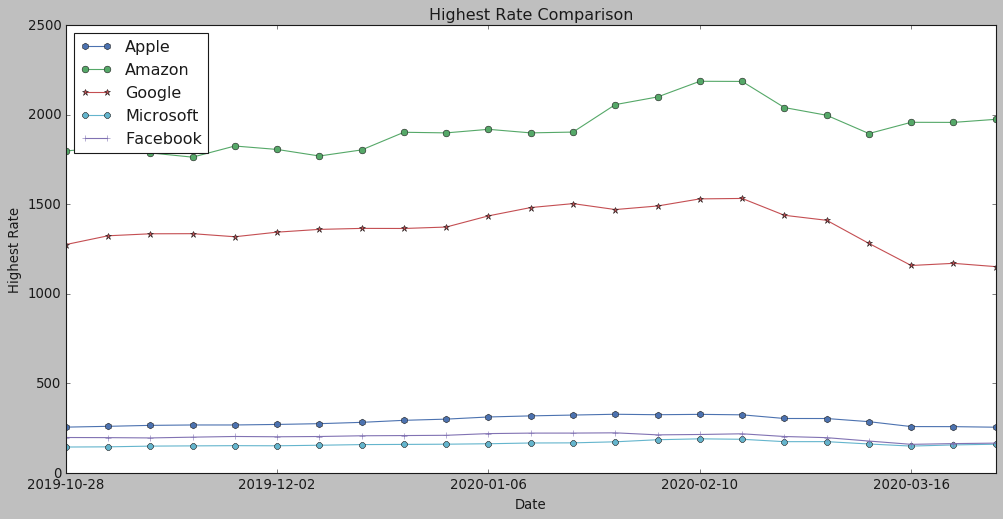

In [130]:
ax = plt.gca()


Apple_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)


plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

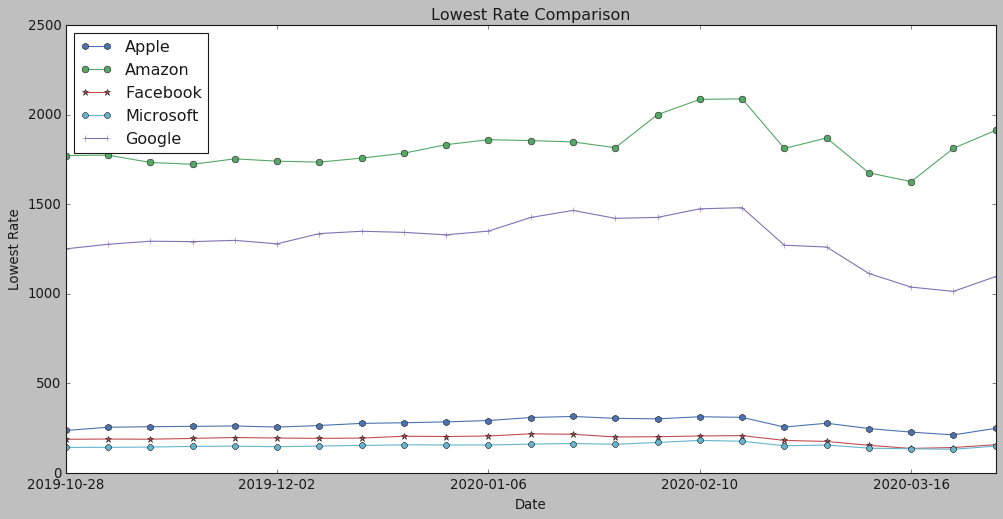

In [131]:
ax = plt.gca()

Apple_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='*',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Google',x_compat=True)


plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

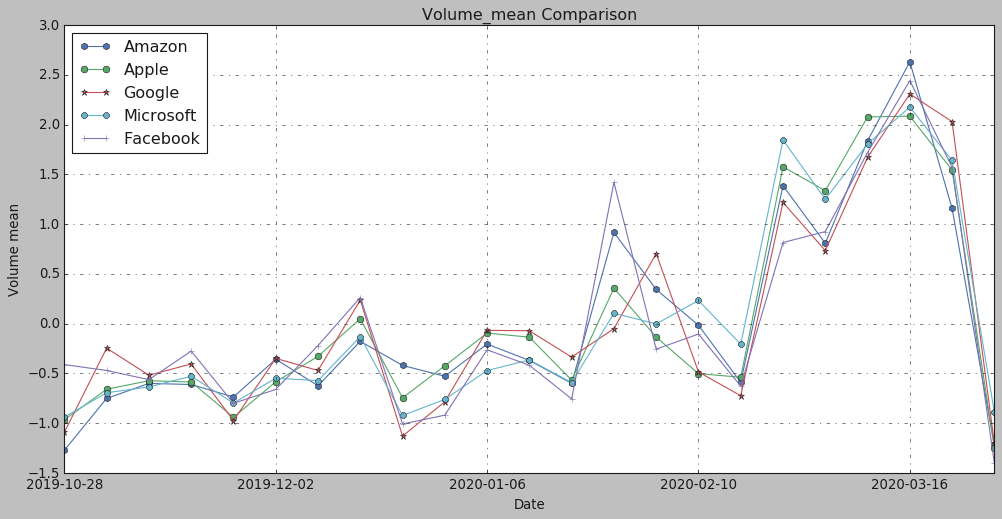

In [132]:
ax = plt.gca()
Amazon_df['Volume_mean']=(Amazon_df['Volume']-Amazon_df['Volume'].mean())/Amazon_df['Volume'].std()
Apple_df['Volume_mean']=(Apple_df['Volume']-Apple_df['Volume'].mean())/Apple_df['Volume'].std()
Google_df['Volume_mean']=(Google_df['Volume']-Google_df['Volume'].mean())/Google_df['Volume'].std()
Microsoft_df['Volume_mean']=(Microsoft_df['Volume']-Microsoft_df['Volume'].mean())/Microsoft_df['Volume'].std()
Facebook_df['Volume_mean']=(Facebook_df['Volume']-Facebook_df['Volume'].mean())/Facebook_df['Volume'].std()
Amazon_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='h',label='Amazon',x_compat=True)
Apple_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='o',label='Apple',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='8',label='Microsoft',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='+',label='Facebook',x_compat=True)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#datacursor(formatter=formatter, hover=True)
plt.title("Volume_mean Comparison")
plt.xlabel("Date")
plt.ylabel("Volume mean");

In [133]:
# Define the minumum of periods to consider 
min_periods = 2

# Calculate the volatility
Apple_volatility=np.log(Apple_df['Adj Close'].pct_change()+1)
Apple_volatility.fillna(0,inplace=True)
Apple_volatility=Apple_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Apple_df['Volatility']=Apple_volatility

Amazon_volatility=np.log(Amazon_df['Adj Close'].pct_change()+1)
Amazon_volatility.fillna(0,inplace=True)
Amazon_volatility=Amazon_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Amazon_df['Volatility']=Amazon_volatility

Google_volatility=np.log(Google_df['Adj Close'].pct_change()+1)
Google_volatility.fillna(0,inplace=True)
Google_volatility=Google_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Google_df['Volatility']=Google_volatility

Microsoft_volatility=np.log(Microsoft_df['Adj Close'].pct_change()+1)
Microsoft_volatility.fillna(0,inplace=True)
Microsoft_volatility=Microsoft_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Microsoft_df['Volatility']=Microsoft_volatility

Facebook_volatility=np.log(Facebook_df['Adj Close'].pct_change()+1)
Facebook_volatility.fillna(0,inplace=True)
Facebook_volatility=Facebook_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Facebook_df['Volatility']=Facebook_volatility


Apple_df['HL_PCT'] = (Apple_df['High'] - Apple_df['Low']) / Apple_df['Close'] * 100.0
Apple_df['PCT_change'] = (Apple_df['Close'] - Apple_df['Open']) / Apple_df['Open'] * 100.0

Amazon_df['HL_PCT'] = (Amazon_df['High'] - Amazon_df['Low']) / Amazon_df['Close'] * 100.0
Amazon_df['PCT_change'] = (Amazon_df['Close'] - Amazon_df['Open']) / Amazon_df['Open'] * 100.0

Google_df['HL_PCT'] = (Google_df['High'] - Google_df['Low']) / Google_df['Close'] * 100.0
Google_df['PCT_change'] = (Google_df['Close'] - Google_df['Open']) / Google_df['Open'] * 100.0

Microsoft_df['HL_PCT'] = (Microsoft_df['High'] - Microsoft_df['Low']) / Microsoft_df['Close'] * 100.0
Microsoft_df['PCT_change'] = (Microsoft_df['Close'] - Microsoft_df['Open']) / Microsoft_df['Open'] * 100.0

Facebook_df['HL_PCT'] = (Facebook_df['High'] - Facebook_df['Low']) / Facebook_df['Close'] * 100.0
Facebook_df['PCT_change'] = (Facebook_df['Close'] - Facebook_df['Open']) / Facebook_df['Open'] * 100.0

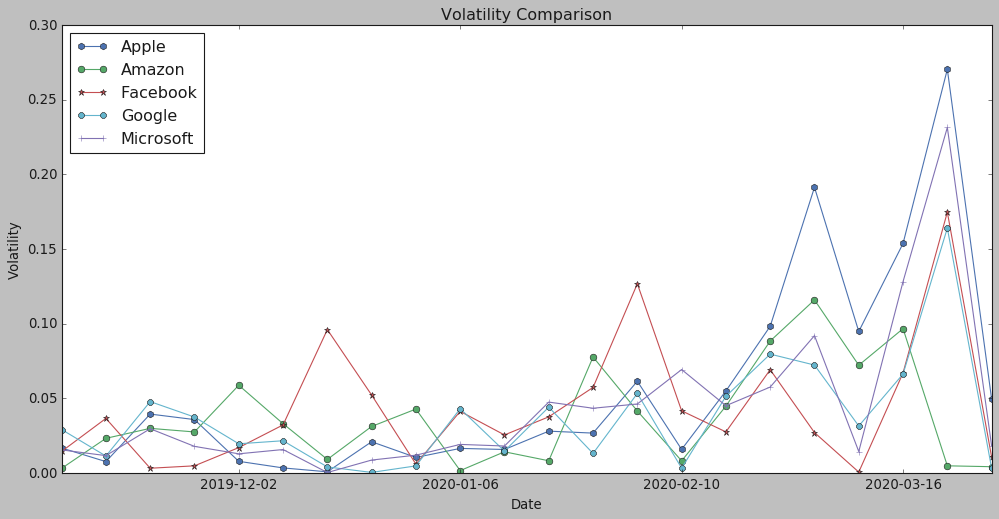

In [134]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='*',label='Facebook',x_compat=True)
Google_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='8',label='Google',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility");

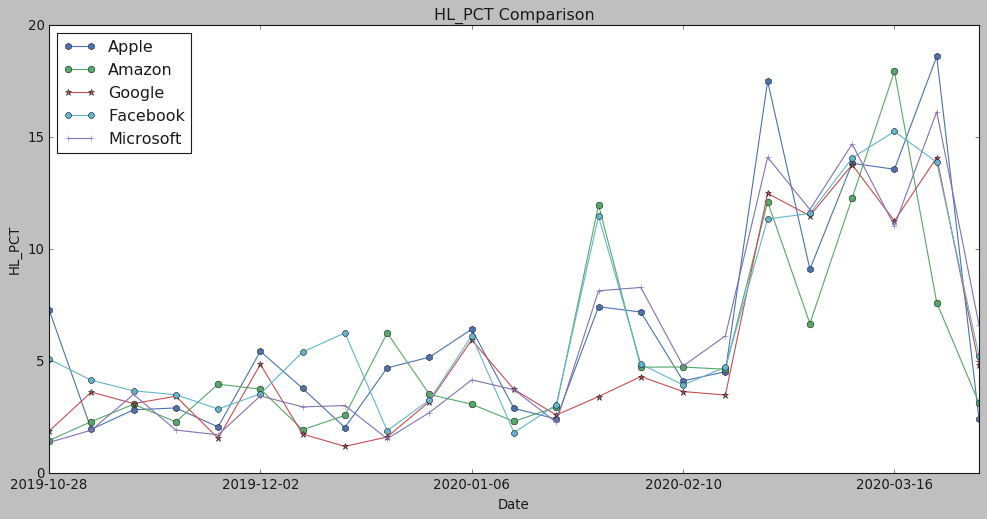

In [135]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("HL_PCT Comparison")
plt.xlabel("Date")
plt.ylabel("HL_PCT");

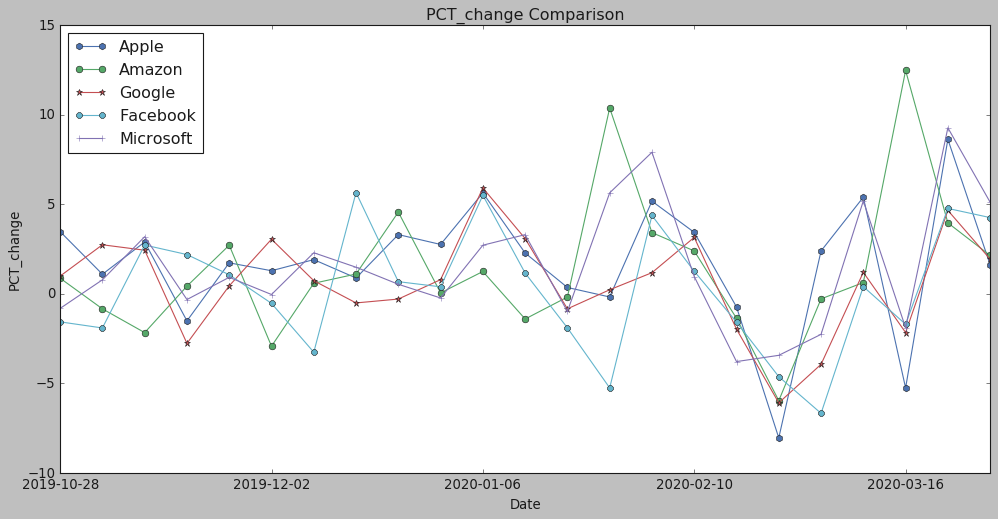

In [136]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Apple_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='h',label='Apple',x_compat=True)
Amazon_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='o',label='Amazon',x_compat=True)
Google_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='*',label='Google',x_compat=True)
Facebook_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='8',label='Facebook',x_compat=True)
Microsoft_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='+',label='Microsoft',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("PCT_change Comparison")
plt.xlabel("Date")
plt.ylabel("PCT_change");

In [137]:
Apple_df = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Amazon_df =  pdr.get_data_yahoo('Amzn', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Google_df =  pdr.get_data_yahoo('GOOG', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Microsoft_df =  pdr.get_data_yahoo('MSFT', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))
Facebook_df =  pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2019, 11, 1), 
                          end=datetime.datetime(2020, 3, 30))



In [138]:
Daily_close_Apple_df = Apple_df[['Adj Close']]

# Daily returns
Daily_pct_change_Apple_df = Daily_close_Apple_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Apple_df.fillna(0, inplace=True)

Daily_pct_change_Apple_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.006567
2019-11-05,-0.001437
2019-11-06,0.000428
2019-11-07,0.011541


In [28]:
Daily_close_Amazon_df = Amazon_df[['Adj Close']]

# Daily returns
Daily_pct_change_Amazon_df = Daily_close_Amazon_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Amazon_df.fillna(0, inplace=True)

Daily_pct_change_Amazon_df.head()


,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.007380
2019-11-05,-0.001635
2019-11-06,-0.003297
2019-11-07,-0.004215


In [29]:
Daily_close_Google_df = Google_df[['Adj Close']]

# Daily returns
Daily_pct_change_Google_df = Daily_close_Google_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Google_df.fillna(0, inplace=True)

Daily_pct_change_Google_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.013841
2019-11-05,0.000511
2019-11-06,-0.000178
2019-11-07,0.013206


In [30]:
Daily_close_Microsoft_df = Microsoft_df[['Adj Close']]

# Daily returns
Daily_pct_change_Microsoft_df = Daily_close_Microsoft_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Microsoft_df.fillna(0, inplace=True)

Daily_pct_change_Microsoft_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.005775
2019-11-05,-0.000623
2019-11-06,-0.002769
2019-11-07,0.001388


In [31]:
Daily_close_Facebook_df = Facebook_df[['Adj Close']]

# Daily returns
Daily_pct_change_Facebook_df = Daily_close_Facebook_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Facebook_df.fillna(0, inplace=True)

Daily_pct_change_Facebook_df.head()

,Adj Close
Date,
2019-11-01,0.000000
2019-11-04,0.005681
2019-11-05,-0.002054
2019-11-06,-0.014255
2019-11-07,-0.005899


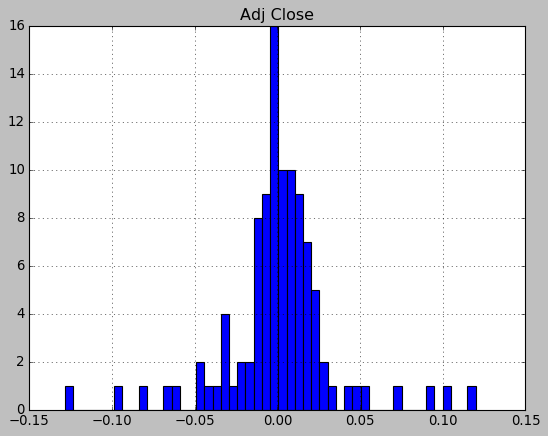

In [32]:

Daily_pct_change_Apple_df.hist(bins=50)

# Show the plot
plt.show()




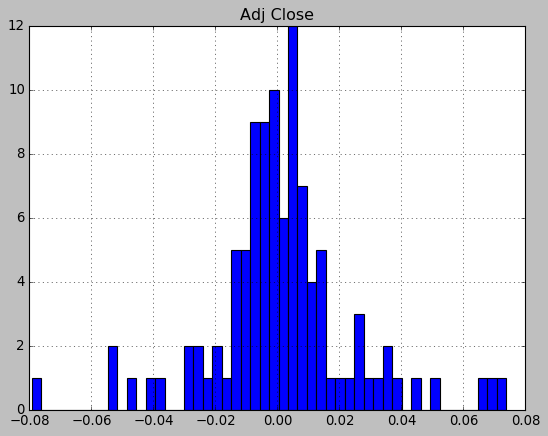

In [33]:
Daily_pct_change_Amazon_df.hist(bins=50)

# Show the plot
plt.show()

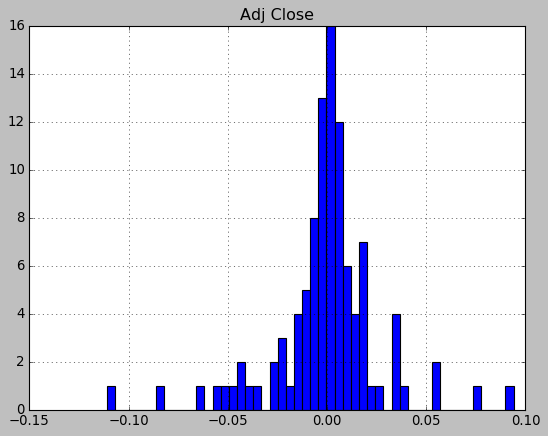

In [34]:
Daily_pct_change_Google_df.hist(bins=50)

# Show the plot
plt.show()

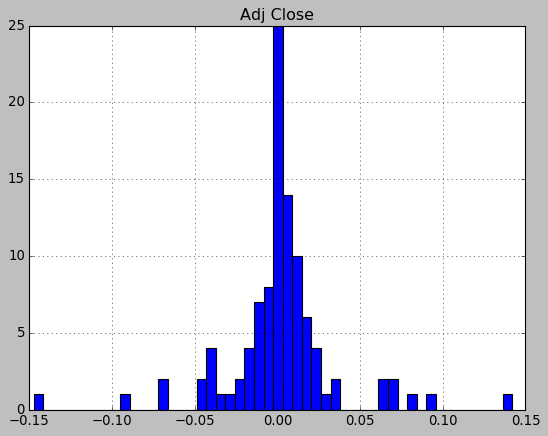

In [35]:
Daily_pct_change_Microsoft_df.hist(bins=50)

# Show the plot
plt.show()

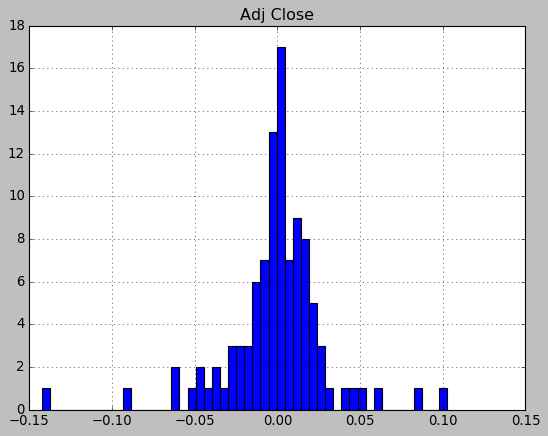

In [36]:
Daily_pct_change_Facebook_df.hist(bins=50)

# Show the plot
plt.show()

In [37]:
import seaborn as sns
sns.set()

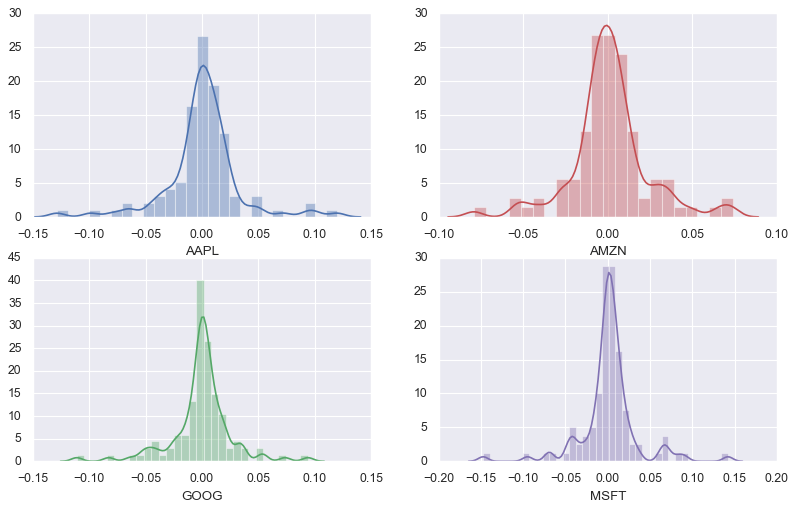

In [38]:
import seaborn as sns
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 7))

# Plot a simple histogram with binsize determined automatically
sns.distplot(Daily_pct_change_Apple_df['Adj Close'], color="b", ax=axes[0, 0], axlabel='AAPL');

# Plot a kernel density estimate and rug plot
sns.distplot(Daily_pct_change_Amazon_df['Adj Close'], color="r", ax=axes[0, 1], axlabel='AMZN');

# Plot a filled kernel density estimate
sns.distplot(Daily_pct_change_Google_df['Adj Close'], color="g", ax=axes[1, 0], axlabel='GOOG');

# Plot a historgram and kernel density estimate
sns.distplot(Daily_pct_change_Microsoft_df['Adj Close'], color="m", ax=axes[1, 1], axlabel='MSFT');


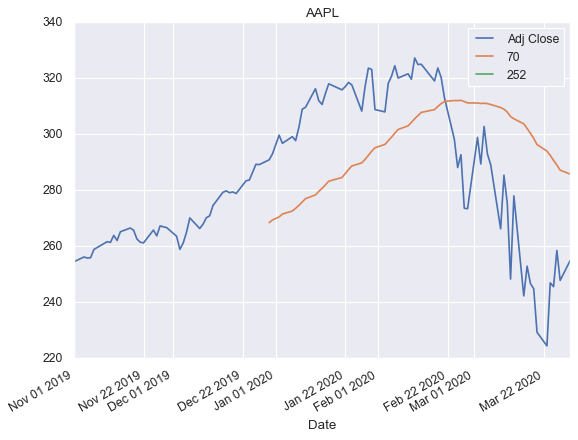

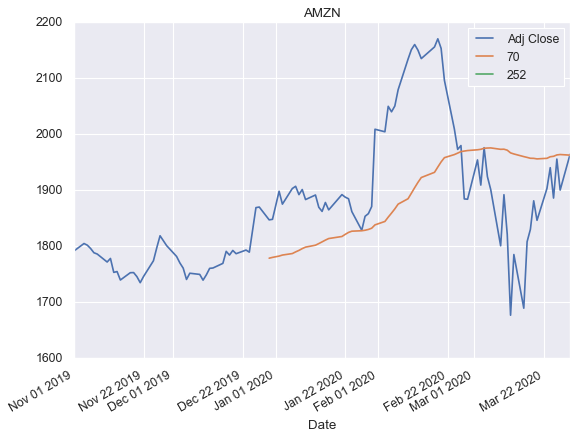

In [39]:
Apple_df_adj_close_px = Apple_df['Adj Close']
# Short moving window rolling mean
Apple_df['70'] = Apple_df_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
Apple_df['252'] = Apple_df_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Apple_df[['Adj Close', '70', '252']].plot(title="AAPL")

# Show plot
plt.show()

Amazon_df_adj_close_px = Amazon_df['Adj Close']
# Short moving window rolling mean
Amazon_df['70'] = Amazon_df_adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
Amazon_df['252'] = Amazon_df_adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Amazon_df[['Adj Close', '70', '252']].plot(title="AMZN")

# Show plot
plt.show()


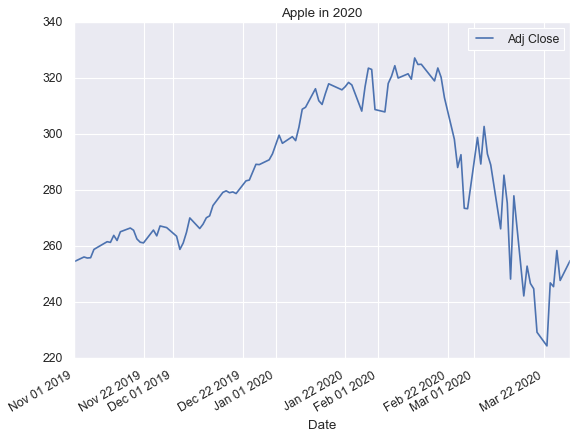

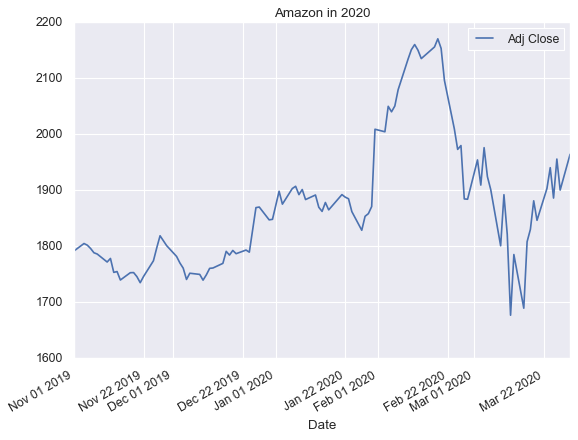

In [40]:
Apple_df.loc['2019-11-01':'2020-03-30'][['Adj Close']].plot(title="Apple in 2020");
Amazon_df.loc['2019-11-01':'2020-03-30'][['Adj Close']].plot(title="Amazon in 2020");

In [41]:
#Prediction 

In [146]:
#Using LSTM

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('AAPL.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX

In [147]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 68ms/step - loss: 0.4394
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.3635
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2987
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.2370
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.1864
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1441
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.1129
Epoch 8/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0854
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0675
Epoch 10/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0604
Epoch 11/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0520
Epoch 12/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0489
Epoch 13/100
19/19 [================

In [148]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[256.7118]]


In [149]:
for pred in prediction:
    print(pred)

279.2343029180262
285.0289863859322
281.21071220097946
268.16742402168035
276.5783142950736
259.1732107147808
256.1552997729527
253.51651927516454
253.77038800718572
242.68375886982096
225.5160486079009
251.50956078624384
257.31820657442375
262.4514928663989
254.08777971267918


In [150]:
#Using Linear Regression

forecast_time = int(15) # write number of predicitons that you want to make e.g 5,10,15 etc.
#Repalce Delta_df with dataframe of your desired company whose prediciton you want to make e.g Airchina_df, Qantas_df etc.
LR_df=Apple_df[['Open','High','Low','Close','Adj Close','Volume']].copy()  # 
#LR_df=Delta_df.iloc[:,1:].copy()

#Replace High with the column that you want to predict
LR_df['prediction'] = LR_df['High'].shift(-1)
LR_df.dropna(inplace=True)
X1 = np.array(LR_df.drop(['prediction'], 1))
Y1 = np.array(LR_df['prediction'])
X2 = preprocessing.scale(X1)
X_prediction = X2[-forecast_time:]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=1)
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_prediction))

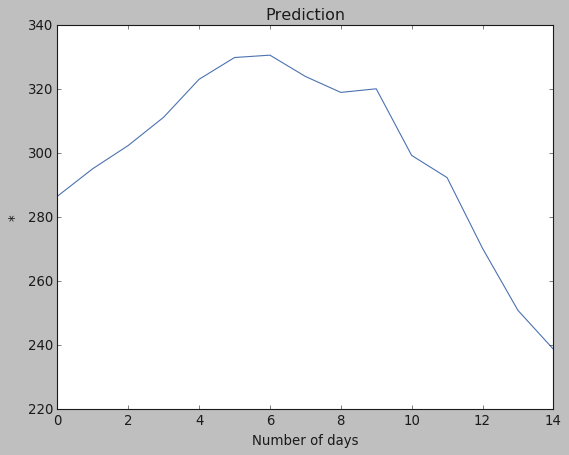

In [151]:
plt.title("Prediction")
plt.xlabel("Number of days")

#Replace * with the column that you want to predict
plt.ylabel("*");
plt.plot(prediction)
plt.show()

In [152]:
cd C:\Users\rony1\Documents\New folder (2)

C:\Users\rony1\Documents\New folder (2)


In [153]:
cd C:\Users\rony1\Documents\New folder (2)

C:\Users\rony1\Documents\New folder (2)


In [154]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
Amazon_df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100


In [155]:
# retriving the data until the last row
Amazon_df = Amazon_df.head(len(Amazon_df)-1)
Amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,1775.989990,1797.449951,1771.479980,1791.439941,1791.439941,5571600
1,2019-11-04,1801.010010,1815.060059,1774.040039,1785.880005,1785.880005,11461600
2,2019-11-11,1778.000000,1786.219971,1732.859985,1739.489990,1739.489990,13165500
3,2019-11-18,1738.300049,1762.520020,1722.709961,1745.719971,1745.719971,13042300
4,2019-11-25,1753.250000,1824.689941,1753.239990,1800.800049,1800.800049,11616400
5,2019-12-02,1804.400024,1805.550049,1740.000000,1751.599976,1751.599976,15917800
6,2019-12-09,1750.660034,1768.989990,1735.000000,1760.939941,1760.939941,12896300
7,2019-12-16,1767.000000,1802.969971,1757.050049,1786.500000,1786.500000,17944600
8,2019-12-23,1788.260010,1901.400024,1784.510010,1869.800049,1869.800049,15209700
9,2019-12-30,1874.000000,1898.010010,1832.229980,1874.969971,1874.969971,13974600


In [156]:
Amazon_df_dates = Amazon_df.loc[:, 'Date']
#Getting  all of the rows from the Close Column
Amazon_df_open = Amazon_df.loc[:, 'Close']

In [157]:
#predicting the company American airlines by reading the csv. we taking a month of data to predict.
Amazon_df = pd.read_csv('AMZN1.csv')
Amazon_df.head(22)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1641.510010,1759.449951,1626.030029,1689.150024,1689.150024,8917300
1,2020-03-17,1775.469971,1857.780029,1689.239990,1807.839966,1807.839966,10917100
2,2020-03-18,1750.000000,1841.660034,1745.000000,1830.000000,1830.000000,9645200
3,2020-03-19,1860.000000,1945.000000,1832.650024,1880.930054,1880.930054,10399900
4,2020-03-20,1926.310059,1957.000000,1820.729980,1846.089966,1846.089966,9817900
5,2020-03-23,1827.750000,1919.400024,1812.000000,1902.829956,1902.829956,7808500
6,2020-03-24,1951.500000,1955.000000,1900.339966,1940.099976,1940.099976,7147100
7,2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
8,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
9,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [158]:
Amazon_df_dates = Amazon_df.loc[:, 'Date']
#Getting  all of the rows from the Close Column
Amazon_df_open = Amazon_df.loc[:, 'Close']

In [159]:
#building  the independent data set for x
for date in Amazon_df_dates:
 dates.append( [int(date.split('-')[2])])
  
#building the dependent data set for y
for Close_price in Amazon_df_open:
  prices.append(float(Close_price))
#printing all the dates 
print(dates)

[[16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14], [15]]


In [160]:
#prediction model to build the relationship between x and y to do a prediction
def predict_prices(dates, prices, x):
  
  #Creating the  Support Vector Regression model
  svr_lin = SVR(kernel='linear', C= 1e3)
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma='auto')
  
  #TRAINING THE DATA SET TO GET THE MODEL OF PREDICTION 
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)
  
  #creating rhe model of LR
  lin_reg = LinearRegression()
  #Trainning the model
  lin_reg.fit(dates,prices)
  
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('SVR MODEL')
  plt.legend()
  plt.show()
  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]


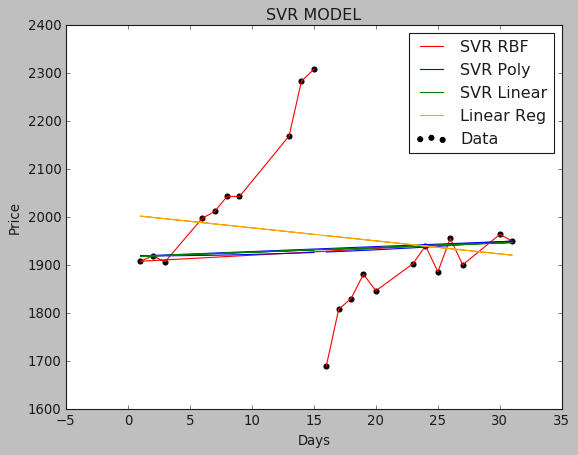

(1689.2503906584013, 1932.3381505454831, 1927.0144817551732, 1961.1548401894133)


In [161]:
#Predict the price of daily Amazon stocks 
predicted_price = predict_prices(dates, prices, [[16]])
print(predicted_price)

USING KNN ALGORITHEM

In [162]:
Amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,1641.510010,1759.449951,1626.030029,1689.150024,1689.150024,8917300
1,2020-03-17,1775.469971,1857.780029,1689.239990,1807.839966,1807.839966,10917100
2,2020-03-18,1750.000000,1841.660034,1745.000000,1830.000000,1830.000000,9645200
3,2020-03-19,1860.000000,1945.000000,1832.650024,1880.930054,1880.930054,10399900
4,2020-03-20,1926.310059,1957.000000,1820.729980,1846.089966,1846.089966,9817900
5,2020-03-23,1827.750000,1919.400024,1812.000000,1902.829956,1902.829956,7808500
6,2020-03-24,1951.500000,1955.000000,1900.339966,1940.099976,1940.099976,7147100
7,2020-03-25,1920.689941,1950.260010,1885.780029,1885.839966,1885.839966,6479100
8,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
9,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900


In [163]:
Amazon_df['Open-Close'] = Amazon_df.Open -Amazon_df.Close
Amazon_df['High-Low'] = Amazon_df.High -Amazon_df.Low
Amazon_df = Amazon_df.dropna()
X= Amazon_df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-47.640014,133.419922
1,-32.369995,168.540039
2,-80.000000,96.660034
3,-20.930054,112.349976
4,80.220093,136.270020


In [164]:
Y= np.where(Amazon_df['Close'].shift(-1)>Amazon_df['Close'],1,-1)

In [173]:
split_percentage = 0.6
split = int(split_percentage*len(Amazon_df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]

In [174]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

In [175]:
print(accuracy_train)
print(accuracy_test)

0.6153846153846154
0.6153846153846154
